# Inhalants

The survey was mainly about liquids, sprays, and gases that people sniff or inhale to get people high or good.

In [3]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [4]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [5]:
case_quest_data = dataset.ix[:,0:2].copy()
inhalants = dataset.ix[:,'AMYLNIT':'IN30EST'].copy() # inhalants dataset

### 1. How many cases used the drug
There are 4613 cases in the survey.

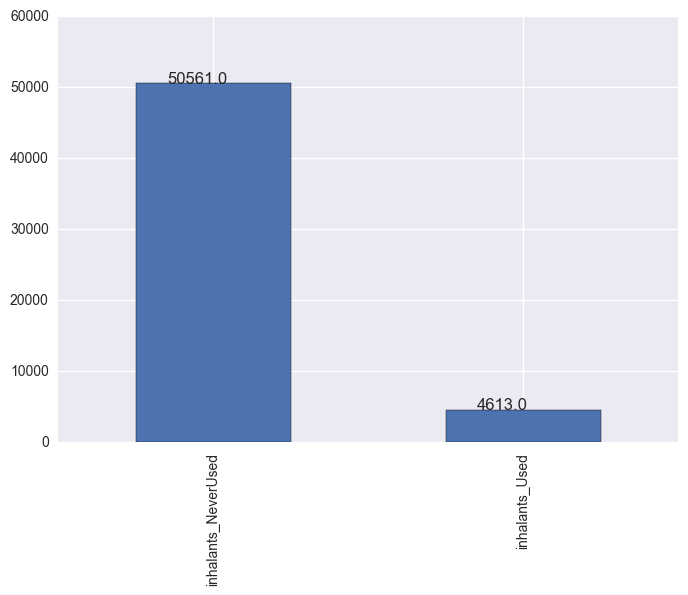

In [44]:
inhalants_Used=inhalants.query('(AMYLNIT ==1)|(CLEFLU==1)|(GAS ==1)|(GLUE ==1)|(ETHER ==1)|(SOLVENT ==1)|(LGAS ==1)|(NITOXID ==1)|(SPPAINT ==1)|(AEROS ==1)|(INHNOLST==1)').shape[0]

inhalants_NeverUsed = inhalants.query('(AMYLNIT==91)').shape[0]
#inhalants_used

Num__inhalants ={"Num":{"inhalants_Used":inhalants_Used,"inhalants_NeverUsed":inhalants_NeverUsed}}
DF_Num__inhalants=pd.DataFrame(Num__inhalants).sort_values('Num', ascending = False)
DF_Num__inhalants

ax= DF_Num__inhalants['Num'].plot.bar()

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

###  2.What are their age range?


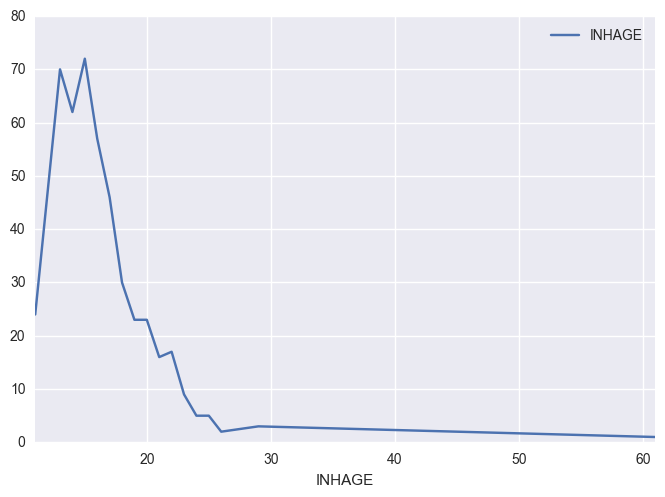

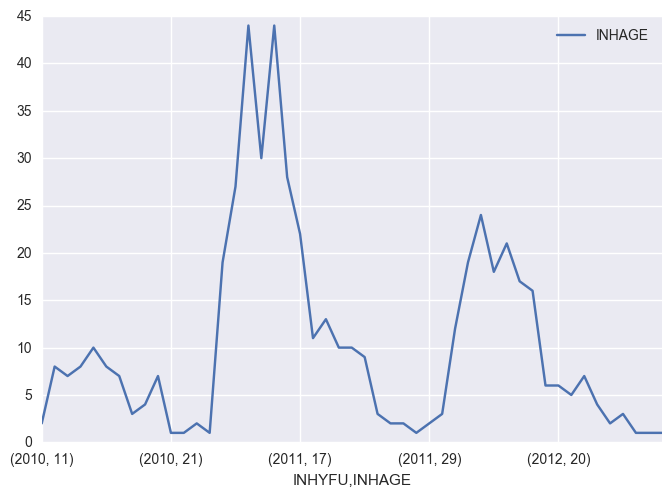

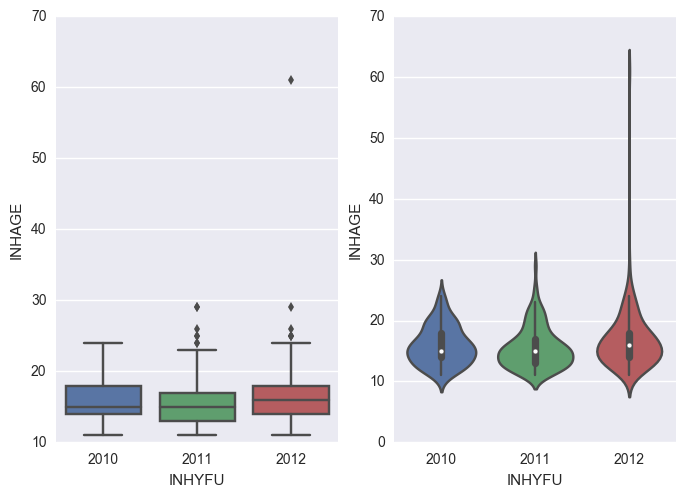

In [47]:
#age
inhalants_age=inhalants.query('((AMYLNIT ==1)|(CLEFLU==1)|(GAS ==1)|(GLUE ==1)|(ETHER ==1)|(SOLVENT ==1)|(LGAS ==1)|(NITOXID ==1)|(SPPAINT ==1)|(AEROS ==1)|(INHNOLST==1))&(INHAGE <=69)&(INHYFU<=2013)')
count = inhalants_age.groupby('INHAGE').agg({ 'INHAGE': 'count'})
count.plot()

# year & age
count_year = inhalants_age.groupby(['INHYFU','INHAGE']).agg({ 'INHAGE': 'count'})
count_year.plot()

inhalants_age.plot(kind='scatter', x='INHYFU',y='INHAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='INHYFU',y='INHAGE',data=inhalants_age)

plt.subplot(122)
sns.violinplot(x='INHYFU',y='INHAGE',data=inhalants_age)


### 3.How frequently they use it?


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F23525F60>]], dtype=object)

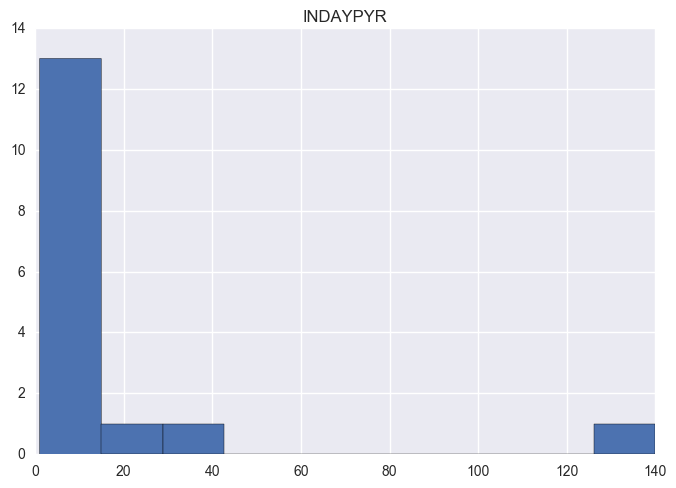

In [48]:
inhalants_fre=inhalants.query('(INDAYPYR<985)&(INHAGE <=69)& (INHYFU<=2012)')
count_days = inhalants_fre.groupby('INDAYPYR').agg({ 'INDAYPYR': 'count'})
count_days.hist()

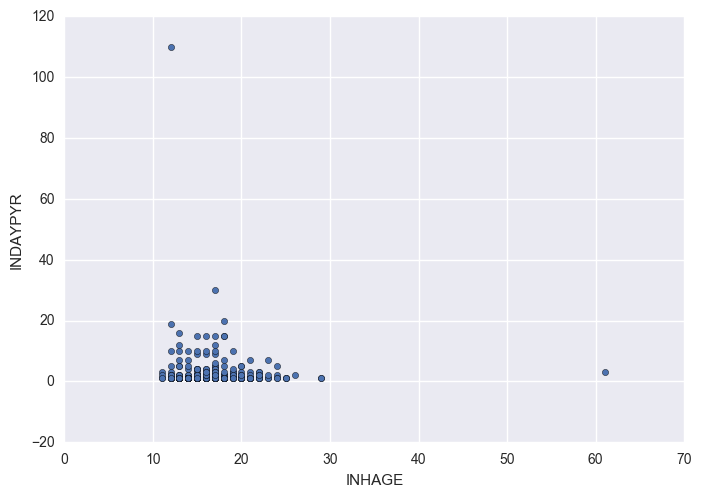

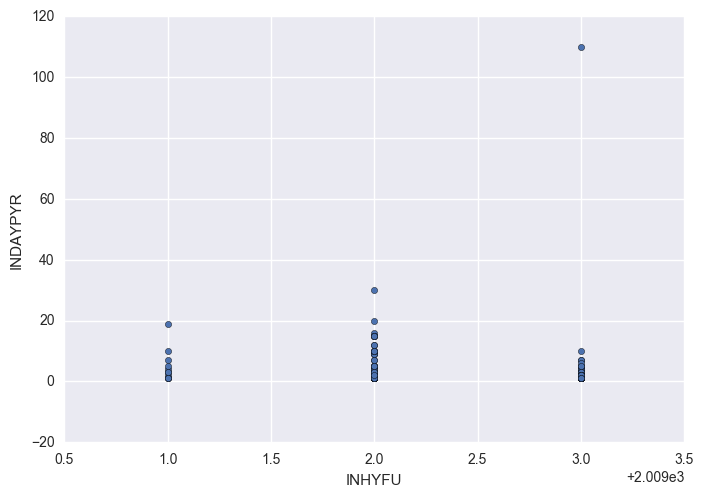

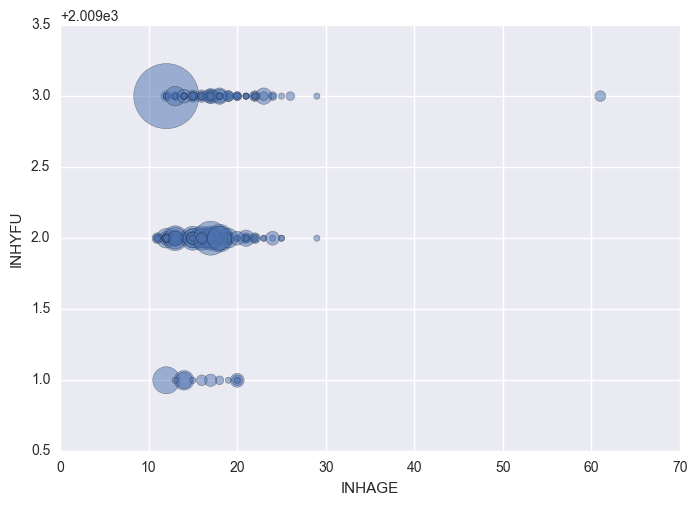

In [30]:
inhalants_fre.plot(kind='scatter', x='INHAGE',y='INDAYPYR')
inhalants_fre.plot(kind='scatter', x='INHYFU',y='INDAYPYR')
inhalants_fre.plot(kind='scatter', x='INHAGE',y='INHYFU',s=inhalants_fre['INDAYPYR']*20,alpha=0.5)

### 4.Did they stop and go back to it? Are they planning to quit?

1 = Within the past 30 days
2 = More than 30 days ago but within the past 12 mons
3 = More than 12 months ago 


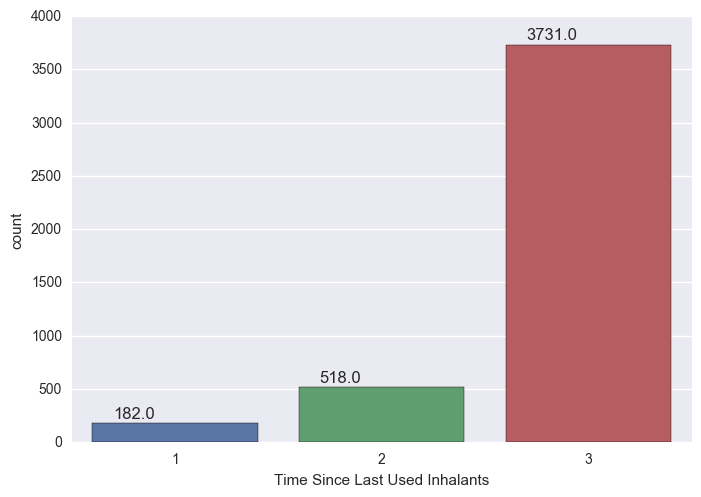

In [50]:
inhalants_quit=inhalants.query('INHREC<4')
ax = sns.countplot(inhalants_quit['INHREC'])
plt.xlabel('Time Since Last Used Inhalants')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Pain Relievers](Pain Relievers.ipynb)